# Restaurants in Faridabad

### Importing Libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import geocoder
from geopy.geocoders import Nominatim 
import requests
import json

from sklearn.cluster import KMeans

import folium

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use('ggplot')

#### Creating variables for connecting the Foursquare API

In [3]:
CLIENT_ID = 'TJBGTETZTGF0ADO42ZLX0TF1KS4AE1XC35N54QJYC3ELCZWA'
CLIENT_SECRET = 'I0F3T1UT051HS2GLDJMNDL1P03N53XCEK4TMLKCNABKZRGDD' 
VERSION = '20190417' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TJBGTETZTGF0ADO42ZLX0TF1KS4AE1XC35N54QJYC3ELCZWA
CLIENT_SECRET:I0F3T1UT051HS2GLDJMNDL1P03N53XCEK4TMLKCNABKZRGDD


### Web Scraping the Mumbai neighbourhod database

In [23]:
df = pd.read_html('https://www.mapsofindia.com/pincode/india/haryana/faridabad/')
df = df[0]

In [24]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 

In [25]:
df.head()

,Location,Pincode,State,District
1,Aharwan,121102,Haryana,Faridabad
2,Alawalpur,121102,Haryana,Faridabad
3,Ali Meo,121106,Haryana,Faridabad
4,Alika,121102,Haryana,Faridabad
5,Alipur,121101,Haryana,Faridabad


In [26]:
address = 'Faridabad, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Faridabad City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Faridabad City are 28.4029786, 77.3103837.


### Using geopy library to get the latitude and longitude values of Faridabad.

In [27]:
address = df['Location']
pcodes = df['Pincode']
loc_latitude = []
loc_longitude = []

for A,B in zip(address,pcodes):
    try:
        A = A + ", Faridabad, haryana, India"
        location = geolocator.geocode(A)
        latitude = float(f"{location.latitude:.6f}")
        longitude = float(f"{location.longitude:.6f}")
        loc_latitude.append(latitude)
        loc_longitude.append(longitude)
        print(latitude,longitude)
        
    except Exception as e:
        print('Error --->',e)
        print(A)
        location = geolocator.geocode('{}, Faridabad, haryana, India'.format(B))
        latitude = float(f"{location.latitude:.6f}")
        longitude = float(f"{location.longitude:.6f}")
        loc_latitude.append(latitude)
        loc_longitude.append(longitude)
        print("new", latitude,longitude)
                                                                                           
df['Latitude']= loc_latitude
df['Longitude']= loc_longitude

Error ---> 'NoneType' object has no attribute 'latitude'
Aharwan, Faridabad, haryana, India
new 28.37275 77.31177
Error ---> 'NoneType' object has no attribute 'latitude'
Alawalpur, Faridabad, haryana, India
new 28.37275 77.31177
Error ---> 'NoneType' object has no attribute 'latitude'
Ali Meo, Faridabad, haryana, India
new 28.37275 77.31177
Error ---> 'NoneType' object has no attribute 'latitude'
Alika, Faridabad, haryana, India
new 28.37275 77.31177
Error ---> 'NoneType' object has no attribute 'latitude'
Alipur, Faridabad, haryana, India
new 28.349431 77.388283
Error ---> 'NoneType' object has no attribute 'latitude'
Amarnagar, Faridabad, haryana, India
new 28.465497 77.308636
Error ---> 'NoneType' object has no attribute 'latitude'
Amarpur, Faridabad, haryana, India
new 28.345872 77.325089
Error ---> 'NoneType' object has no attribute 'latitude'
Amroli, Faridabad, haryana, India
new 28.37275 77.31177
Error ---> 'NoneType' object has no attribute 'latitude'
Anangpur, Faridabad, hary

In [67]:
df.head(10)

,Location,Pincode,State,District,Latitude,Longitude
1,Aharwan,121102,Haryana,Faridabad,28.372750,77.311770
2,Alawalpur,121102,Haryana,Faridabad,28.372750,77.311770
3,Ali Meo,121106,Haryana,Faridabad,28.372750,77.311770
4,Alika,121102,Haryana,Faridabad,28.372750,77.311770
5,Alipur,121101,Haryana,Faridabad,28.349431,77.388283
6,Amarnagar,121003,Haryana,Faridabad,28.465497,77.308636
7,Amarpur,121004,Haryana,Faridabad,28.345872,77.325089
8,Amroli,121102,Haryana,Faridabad,28.372750,77.311770
9,Anangpur,121003,Haryana,Faridabad,28.465497,77.308636
10,Andhop,121106,Haryana,Faridabad,28.372750,77.311770


## Map of Faridabad

In [30]:
# create map of Faridabad using latitude and longitude values
map_far = folium.Map(location=[28.4029786, 77.3103837], zoom_start=11)

# add markers to map
for lat, lng, loc in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = '{}'.format(loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#cc3131',
        fill_opacity=0.5,
        parse_html=False).add_to(map_far)  
    
map_far

In [31]:
neighborhood_latitude = df.loc[45, 'Latitude']
neighborhood_longitude = df.loc[45, 'Longitude']

neighborhood_name = df.loc[45, 'Location']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Feroz Gandhi nagar faridabad are 28.39425, 77.302702.


### Setting the Limit and Radius for the API

In [32]:
LIMIT = 200
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [33]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608d711d0e6a1736544a458c'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Farīdābād',
  'headerFullLocation': 'Farīdābād',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 28.398750004500005,
    'lng': 77.30780785582174},
   'sw': {'lat': 28.389749995499994, 'lng': 77.29759614417826}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '517bff28e4b0cfe150cd2cdd',
       'name': "Domino's Pizza",
       'location': {'address': 'Shop No. 5A, Ground Floor, Nehru Ground, NIT, FARIDABAD 121004 PH NO :',
        'lat': 28.391,
        'lng': 77.302,
        'labeledLatLng

In [34]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.io.json.json_normalize(venues) 

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/aditya/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Domino's Pizza,Pizza Place,28.391000,77.302000
1,Lions Community Center,Memorial Site,28.389924,77.301302


## Exploring Neighborhoods in Faridabad

#### Function to repeat the same process to all the neighborhoods in Faridabad

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Code to run the above function on each neighborhood and create a new dataframe called *Faridabad_venues*.

In [37]:
Faridabad_venues = getNearbyVenues(names=df['Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Aharwan
Alawalpur
Ali Meo
Alika
Alipur
Amarnagar
Amarpur
Amroli
Anangpur
Andhop
Asaota
Asaoti
Atali
Aurangabad
Badarpur Syed
Baghola
Bahin
Ballabgarh
Bamni Khera
Banchari
Banswa
Baroli
Bhainsrawali
Bhandoli
Bhaskola
Bhiduki
Bhuvapur
Chandpur
Chant
Chawla Colony ballabgarh
Chhainsa
Chhajju Nagar
Dayalpur
Deeg
Dhatir
Dhauj
Dighot
Escortsnagar Faridabad
Factory Area faridabad
Faridabad City
Faridabad Nit
Faridpur
Fatehpur Billoch
Fatehpur Tagga
Feroz Gandhi nagar faridabad
G.T. road faridabad
Gadpuri
Gehlab
Gharrot
Ghori
Gonchhi
Gorota
Grain Market palwal
Gulawad
Gurukul Indraprashtha
Hassanpur
Hathin
Hodal
Hurithal
Industrial Area faridabad
Jaindapur
Janauli
Jawahar Colony faridabad
Jawahar Nagar palwal
Jawan
Katesara
Khaika
Khambi
Khatela Sarai
Kheri Kalan
Kondal
Kot
Kurali
Likhi
Lohina
Machhgar
Madnaka
Malai
Mandkola
Manjhawali
Manpur
Marraoli
Mathura Road faridabad
Mohna
N.I.f.m. faridabad
N.T.p.c./sector-10 faridabad
Nangal Jat
Neemka
New Township palwal
Nh-2 Faridabad
Nh-3 Faridabad

In [38]:
print(Faridabad_venues.shape)
Faridabad_venues.head(10)

(244, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aharwan,28.372750,77.311770,McDonald's,28.372232,77.314900,Fast Food Restaurant
1,Aharwan,28.372750,77.311770,Bata Railway Station,28.376448,77.309683,Train Station
2,Alawalpur,28.372750,77.311770,McDonald's,28.372232,77.314900,Fast Food Restaurant
3,Alawalpur,28.372750,77.311770,Bata Railway Station,28.376448,77.309683,Train Station
4,Ali Meo,28.372750,77.311770,McDonald's,28.372232,77.314900,Fast Food Restaurant
5,Ali Meo,28.372750,77.311770,Bata Railway Station,28.376448,77.309683,Train Station
6,Alika,28.372750,77.311770,McDonald's,28.372232,77.314900,Fast Food Restaurant
7,Alika,28.372750,77.311770,Bata Railway Station,28.376448,77.309683,Train Station
8,Amarnagar,28.465497,77.308636,Inox,28.469478,77.307258,Multiplex
9,Amarnagar,28.465497,77.308636,Bercos,28.469710,77.307015,Chinese Restaurant


In [39]:
Faridabad_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,19,19,19,19,19,19
Arts & Crafts Store,1,1,1,1,1,1
Bakery,1,1,1,1,1,1
Big Box Store,1,1,1,1,1,1
Café,2,2,2,2,2,2
Chinese Restaurant,4,4,4,4,4,4
Clothing Store,8,8,8,8,8,8
Diner,1,1,1,1,1,1
Electronics Store,1,1,1,1,1,1


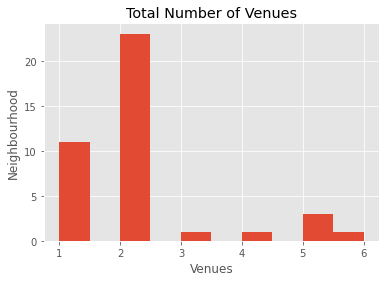

In [40]:
ax = Faridabad_venues.groupby('Neighborhood').count()
ax["Venue"].head(40).plot(kind='hist')
plt.title('Total Number of Venues')
plt.ylabel('Neighbourhood')
plt.xlabel('Venues')
plt.show()

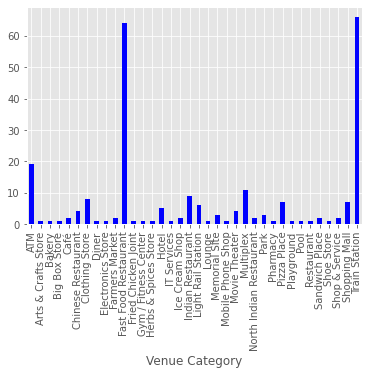

In [61]:
aa= Faridabad_venues.groupby("Venue Category").count()
aa["Venue"].head(45).plot(kind = "bar",color="blue")
plt.show()

In [42]:
Faridabad_venues[Faridabad_venues["Venue Category"]=="Café"]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
196,Sector-15 Faridabad,28.398356,77.3231,Café Parmesan,28.395362,77.323522,Café
199,Sector-15 Faridabad,28.398356,77.3231,Cafe Coffee Day,28.395455,77.323707,Café


In [43]:
print('There are {} uniques categories.'.format(len(Faridabad_venues['Venue Category'].unique())))

There are 36 uniques categories.


In [44]:
Faridabad_venues['Venue Category'].unique()[:100]


array(['Fast Food Restaurant', 'Train Station', 'Multiplex',
       'Chinese Restaurant', 'Indian Restaurant', 'Movie Theater', 'ATM',
       'Farmers Market', 'Light Rail Station', 'Shopping Mall',
       'Clothing Store', 'Sandwich Place', 'Pool', 'Park', 'Pizza Place',
       'Memorial Site', 'Ice Cream Shop', 'Hotel', 'Bakery', 'Diner',
       'Shoe Store', 'Playground', 'Pharmacy', 'Café',
       'Fried Chicken Joint', 'Gym / Fitness Center',
       'North Indian Restaurant', 'Restaurant', 'Big Box Store',
       'IT Services', 'Herbs & Spices Store', 'Mobile Phone Shop',
       'Shop & Service', 'Electronics Store', 'Arts & Crafts Store',
       'Lounge'], dtype=object)

## Analyze Each Neighborhood

In [45]:
# one hot encoding
M_onehot = pd.get_dummies(Faridabad_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
M_onehot['Neighborhood'] = Faridabad_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [M_onehot.columns[-1]] + list(M_onehot.columns[:-1])
M_onehot = M_onehot[fixed_columns]

M_onehot.head()

,Neighborhood,ATM,Arts & Crafts Store,Bakery,Big Box Store,Café,Chinese Restaurant,Clothing Store,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Fried Chicken Joint,Gym / Fitness Center,Herbs & Spices Store,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Light Rail Station,Lounge,Memorial Site,Mobile Phone Shop,Movie Theater,Multiplex,North Indian Restaurant,Park,Pharmacy,Pizza Place,Playground,Pool,Restaurant,Sandwich Place,Shoe Store,Shop & Service,Shopping Mall,Train Station
0,Aharwan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aharwan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Alawalpur,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alawalpur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Ali Meo,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [46]:
M_grouped = M_onehot.groupby('Neighborhood').mean().reset_index()
M_grouped

,Neighborhood,ATM,Arts & Crafts Store,Bakery,Big Box Store,Café,Chinese Restaurant,Clothing Store,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Fried Chicken Joint,Gym / Fitness Center,Herbs & Spices Store,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Light Rail Station,Lounge,Memorial Site,Mobile Phone Shop,Movie Theater,Multiplex,North Indian Restaurant,Park,Pharmacy,Pizza Place,Playground,Pool,Restaurant,Sandwich Place,Shoe Store,Shop & Service,Shopping Mall,Train Station
0,Aharwan,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.500000,0.00,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5
1,Alawalpur,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.500000,0.00,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5
2,Ali Meo,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.500000,0.00,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5
3,Alika,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.500000,0.00,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5
4,Amarnagar,0.000000,0.000000,0.000000,0.0,0.0,0.2,0.00,0.000000,0.0,0.0,0.200000,0.00,0.00,0.0,0.000000,0.0,0.00,0.20,0.0,0.000000,0.0,0.0,0.200000,0.200000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
5,Amarpur,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.00,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
6,Amroli,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.500000,0.00,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5
7,Anangpur,0.000000,0.000000,0.000000,0.0,0.0,0.2,0.00,0.000000,0.0,0.0,0.200000,0.00,0.00,0.0,0.000000,0.0,0.00,0.20,0.0,0.000000,0.0,0.0,0.200000,0.200000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8,Andhop,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.500000,0.00,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5
9,Asaota,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.500000,0.00,0.00,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5


#### And let's examine the new dataframe size.

In [47]:
M_onehot.shape

(244, 37)

In [48]:
M_grouped.shape

(108, 37)

#### Let's print each neighborhood along with the top 5 most common venues

In [49]:
num_top_venues = 5

for hood in M_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = M_grouped[M_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aharwan----
                  venue  freq
0         Train Station   0.5
1  Fast Food Restaurant   0.5
2                Lounge   0.0
3     Mobile Phone Shop   0.0
4         Movie Theater   0.0


----Alawalpur----
                  venue  freq
0         Train Station   0.5
1  Fast Food Restaurant   0.5
2                Lounge   0.0
3     Mobile Phone Shop   0.0
4         Movie Theater   0.0


----Ali Meo----
                  venue  freq
0         Train Station   0.5
1  Fast Food Restaurant   0.5
2                Lounge   0.0
3     Mobile Phone Shop   0.0
4         Movie Theater   0.0


----Alika----
                  venue  freq
0         Train Station   0.5
1  Fast Food Restaurant   0.5
2                Lounge   0.0
3     Mobile Phone Shop   0.0
4         Movie Theater   0.0


----Amarnagar----
                  venue  freq
0  Fast Food Restaurant   0.2
1     Indian Restaurant   0.2
2         Movie Theater   0.2
3             Multiplex   0.2
4    Chinese Restaurant   0.2


----Amar

In [50]:
len(M_grouped[M_grouped["Fast Food Restaurant"] > 0])

64

In [51]:
FFR = M_grouped[["Neighborhood","Fast Food Restaurant"]]
FFR

,Neighborhood,Fast Food Restaurant
0,Aharwan,0.500000
1,Alawalpur,0.500000
2,Ali Meo,0.500000
3,Alika,0.500000
4,Amarnagar,0.200000
5,Amarpur,0.000000
6,Amroli,0.500000
7,Anangpur,0.200000
8,Andhop,0.500000
9,Asaota,0.500000


#### Function to sort the venues in descending order.

In [52]:
# Sorting Function
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

#### Creating the new dataframe and display the top 10 venues for each neighborhood.

In [53]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = M_grouped['Neighborhood']

for ind in np.arange(M_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(M_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aharwan,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
1,Alawalpur,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
2,Ali Meo,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
3,Alika,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
4,Amarnagar,Indian Restaurant,Chinese Restaurant,Movie Theater,Multiplex,Fast Food Restaurant,Farmers Market,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint
5,Amarpur,ATM,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
6,Amroli,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
7,Anangpur,Indian Restaurant,Chinese Restaurant,Movie Theater,Multiplex,Fast Food Restaurant,Farmers Market,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint
8,Andhop,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
9,Asaota,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store


#### Using the elbow method to find the optimal number of clusters

/home/aditya/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  """


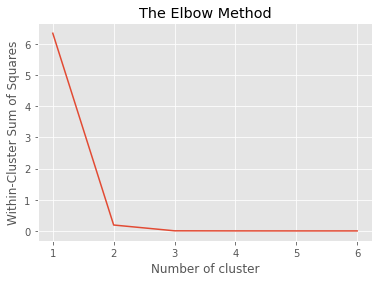

In [54]:
wcss = []
# run k-means clustering
M_grouped_clustering = FFR.drop('Neighborhood', 1)
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=4).fit(M_grouped_clustering)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
# check cluster labels generated for each row in the dataframe
wcss

no_of_cluster = range(1,7)
plt.plot(no_of_cluster,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

## Clustering Neighborhoods

In [55]:
# set number of clusters
kclusters = 3
M_grouped_clustering = FFR.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=4).fit(M_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 1, 0, 2, 0, 0], dtype=int32)

In [56]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
M_merged = df

# merge M_grouped with M_data to add latitude/longitude for each neighborhood
M_merged = M_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Location')

M_merged.head()# check the last columns!

,Location,Pincode,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Aharwan,121102,Haryana,Faridabad,28.372750,77.311770,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
2,Alawalpur,121102,Haryana,Faridabad,28.372750,77.311770,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
3,Ali Meo,121106,Haryana,Faridabad,28.372750,77.311770,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
4,Alika,121102,Haryana,Faridabad,28.372750,77.311770,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
5,Alipur,121101,Haryana,Faridabad,28.349431,77.388283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
M_merged.dropna(subset=["Cluster Labels"], axis =0 , inplace =True)

In [58]:
M_merged.astype({"Cluster Labels": "int32"}).head(10)

,Location,Pincode,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Aharwan,121102,Haryana,Faridabad,28.372750,77.311770,0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
2,Alawalpur,121102,Haryana,Faridabad,28.372750,77.311770,0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
3,Ali Meo,121106,Haryana,Faridabad,28.372750,77.311770,0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
4,Alika,121102,Haryana,Faridabad,28.372750,77.311770,0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
6,Amarnagar,121003,Haryana,Faridabad,28.465497,77.308636,2,Indian Restaurant,Chinese Restaurant,Movie Theater,Multiplex,Fast Food Restaurant,Farmers Market,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint
7,Amarpur,121004,Haryana,Faridabad,28.345872,77.325089,1,ATM,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
8,Amroli,121102,Haryana,Faridabad,28.372750,77.311770,0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
9,Anangpur,121003,Haryana,Faridabad,28.465497,77.308636,2,Indian Restaurant,Chinese Restaurant,Movie Theater,Multiplex,Fast Food Restaurant,Farmers Market,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint
10,Andhop,121106,Haryana,Faridabad,28.372750,77.311770,0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
11,Asaota,121102,Haryana,Faridabad,28.372750,77.311770,0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store


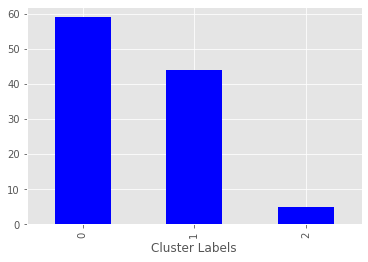

In [60]:
M_merged1 = M_merged.astype({"Cluster Labels": "int32"}).groupby(["Cluster Labels"]).count()
M_merged1["Pincode"].plot(kind = "bar", color="blue")
plt.show()

#### Visualizing the resulting clusters

In [63]:
# create map
map_clusters = folium.Map(location=[28.4029786, 77.3103837], zoom_start=10.75)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(M_merged['Latitude'], M_merged['Longitude'], M_merged['Location'], M_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## Examine Clusters 

In [64]:
M_merged.loc[M_merged['Cluster Labels'] == 0, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,121102,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
2,121102,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
3,121106,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
4,121102,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
8,121102,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
10,121106,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
11,121102,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
14,121105,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
16,121102,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store
17,121105,77.31177,0.0,Train Station,Fast Food Restaurant,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market,Electronics Store


In [65]:
M_merged.loc[M_merged['Cluster Labels'] == 1, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,121004,77.325089,1.0,ATM,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
12,121102,77.323616,1.0,Train Station,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
13,121004,77.325089,1.0,ATM,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
25,121002,77.324288,1.0,Farmers Market,Train Station,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
28,121101,77.307077,1.0,Train Station,Clothing Store,Light Rail Station,Multiplex,Shopping Mall,Café,Chinese Restaurant,Big Box Store,Diner,IT Services
30,121004,77.325089,1.0,ATM,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
33,121004,77.325089,1.0,ATM,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
34,121004,77.325089,1.0,ATM,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
36,121004,77.325089,1.0,ATM,Shopping Mall,IT Services,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market,Electronics Store
38,121007,77.323094,1.0,Sandwich Place,Pool,Park,Train Station,Diner,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint,Fast Food Restaurant,Farmers Market


In [66]:
M_merged.loc[M_merged['Cluster Labels'] == 2, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,121003,77.308636,2.0,Indian Restaurant,Chinese Restaurant,Movie Theater,Multiplex,Fast Food Restaurant,Farmers Market,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint
9,121003,77.308636,2.0,Indian Restaurant,Chinese Restaurant,Movie Theater,Multiplex,Fast Food Restaurant,Farmers Market,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint
40,121002,77.310384,2.0,Indian Restaurant,Clothing Store,Fast Food Restaurant,Ice Cream Shop,Big Box Store,Café,Chinese Restaurant,Bakery,Diner,Shopping Mall
103,121007,77.321354,2.0,Park,Shopping Mall,Fast Food Restaurant,Movie Theater,Pizza Place,Multiplex,Electronics Store,Gym / Fitness Center,Fried Chicken Joint,Farmers Market
123,121003,77.308636,2.0,Indian Restaurant,Chinese Restaurant,Movie Theater,Multiplex,Fast Food Restaurant,Farmers Market,Hotel,Herbs & Spices Store,Gym / Fitness Center,Fried Chicken Joint
